<a href="https://colab.research.google.com/github/Sumit189/Abusive-Language-Detection/blob/main/notebook/A_N_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cp /content/drive/MyDrive/ExpertSystem/clean_data.csv /content/

In [2]:
import pandas as pd

In [3]:
!pip install tweet-preprocessor
import preprocessor as p

In [4]:
df1= pd.read_csv('clean_data.csv')

In [5]:
df1.head()

,is_offensive,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


In [6]:
df1['is_offensive'].unique()

array([0, 1])

In [7]:
labels = ['Neutral', 'Abusive']

In [8]:
count_n = 0
count_a = 0
for i in range(len(df1['is_offensive'])):
  if df1['is_offensive'][i] == 0:
    count_n += 1
  else:
    count_a += 1

print("Neutral: ", count_n)
print("Abusive: ", count_a)

Neutral:  147509
Abusive:  36845


In [9]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sumit189","key":"6e0deaf0e19a4f0cdac54f64894b3c1c"}'}

In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d vkrahul/twitter-hate-speech

  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 63.3MB/s]


In [12]:
!unzip /content/twitter-hate-speech.zip

Archive:  /content/twitter-hate-speech.zip
  inflating: test_tweets_anuFYb8.csv  
  inflating: train_E6oV3lV.csv       


In [13]:
df2 = pd.read_csv('/content/train_E6oV3lV.csv')

In [14]:
df2.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [15]:
df2 = df2.drop(columns=['id'])

In [16]:
df2.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [17]:
df2.label.unique()

array([0, 1])

In [18]:
clean_text  = []
labels = []
for i in range(len(df2['tweet'])):
  clean_ = p.clean(df2['tweet'][i])
  clean_text.append(clean_)
  labels.append(df2['label'][i])

In [19]:
df2 = pd.DataFrame(list(zip(labels, clean_text)),
                  columns = ['label','tweet'])

In [20]:
df2.head()

,label,tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for credit i can't use cause they don't...
2,0,bihday your majesty
3,0,i love u take with u all the time in ur!!!
4,0,factsguide: society now


In [21]:
abusive_text = []
for i in range(len(df2['label'])):
  if df2['label'][i] == 1:
    abusive_text.append(df2['tweet'][i])

In [22]:
!git clone "https://github.com/t-davidson/hate-speech-and-offensive-language.git"

Cloning into 'hate-speech-and-offensive-language'...
remote: Enumerating objects: 32, done.
remote: Total 32 (delta 0), reused 0 (delta 0), pack-reused 32
Unpacking objects: 100% (32/32), done.


In [23]:
df3 = pd.read_csv('/content/hate-speech-and-offensive-language/data/labeled_data.csv')

In [24]:
df3.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [25]:
df3 = df3.drop(columns=['Unnamed: 0','count', 'hate_speech', 'offensive_language','neither'])

In [26]:
df3.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [27]:
df3['class'].unique()

array([2, 1, 0])

In [28]:
clean_text  = []
labels = []
for i in range(len(df3['tweet'])):
  clean_ = p.clean(df3['tweet'][i])
  clean_text.append(clean_)
  labels.append(df3['class'][i])

In [29]:
df3 = pd.DataFrame(list(zip(labels, clean_text)),
                  columns = ['label','tweet'])

In [30]:
df3.head()

,label,tweet
0,2,!!! RT : As a woman you shouldn't complain abo...
1,1,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,1,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch...
3,1,!!!!!!!!! RT : she look like a tranny
4,1,!!!!!!!!!!!!! RT : The shit you hear about me ...


In [31]:
for i in range(len(df3['label'])):
  if df3['label'][i] != 2:
    abusive_text.append(df3['tweet'][i])

# MMHS150K


In [32]:
!cp /content/drive/MyDrive/ExpertSystem/MMHS150K_GT.json /content/

In [33]:
df4 = pd.read_json('/content/MMHS150K_GT.json')

In [34]:
df4 = df4.transpose()

In [35]:
df4.head()

,img_url,labels,tweet_url,tweet_text,labels_str
2005-04-28 09:09:13.714016256,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,"[4, 1, 3]",https://twitter.com/user/status/11146793537140...,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[Religion, Racist, Homophobe]"
2003-09-08 11:20:48.816660480,http://pbs.twimg.com/ext_tw_video_thumb/106301...,"[5, 5, 5]",https://twitter.com/user/status/10630200488166...,My horses are retarded https://t.co/HYhqc6d5WN,"[OtherHate, OtherHate, OtherHate]"
2005-02-20 19:22:48.075374593,http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg,"[0, 0, 0]",https://twitter.com/user/status/11089273680753...,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[NotHate, NotHate, NotHate]"
2005-04-26 23:35:34.635618305,http://pbs.twimg.com/ext_tw_video_thumb/111401...,"[1, 0, 0]",https://twitter.com/user/status/11145585346356...,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[Racist, NotHate, NotHate]"
2002-10-22 02:08:00.215592966,http://pbs.twimg.com/media/Dl30pGIU8AAVGxO.jpg,"[1, 0, 1]",https://twitter.com/user/status/10352524802155...,“EVERYbody calling you Nigger now!” https://t....,"[Racist, NotHate, Racist]"


In [36]:
df4 = df4.drop(columns= ["img_url", "tweet_url"])

In [37]:
df4.reset_index(inplace=True)

In [38]:
df4 = df4.drop(columns=["index"])

In [39]:
clean_text  = []
labels = []
for i in range(len(df4['labels'])):
  clean_ = p.clean(df4['tweet_text'][i])
  clean_text.append(clean_)
  labels.append(df4['labels'][i])

In [40]:
df4 = pd.DataFrame(list(zip(labels, clean_text)),
                  columns = ['labels','tweet_text'])

In [41]:
df4.head()

,labels,tweet_text
0,"[4, 1, 3]",Nigga
1,"[5, 5, 5]",My horses are retarded
2,"[0, 0, 0]",NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL SH...
3,"[1, 0, 0]",xxSuGVNGxx: I ran into this HOLY NIGGA TODAY
4,"[1, 0, 1]",EVERYbody calling you Nigger now!


In [42]:
omit = [0,0,0]
for i in range(len(df4['labels'])):
  if (df4['labels'][i]!=omit):
    abusive_text.append(df4['tweet_text'][i])

In [ ]:
df2 = df2.drop(columns=['label'])
df3 = df3.drop(columns=['label'])

In [45]:
df4 = df4.drop(columns=['labels'])

In [46]:
all_text = []
all_labels = []
for i in range(len(df1['text'])):
  all_text.append(df1['text'][i])
  all_labels.append(df1['is_offensive'][i])

In [47]:
for i in range(len(abusive_text)):
  all_text.append(abusive_text[i])
  all_labels.append(1)

In [48]:
df = pd.DataFrame(list(zip(all_labels, all_text)),
                  columns = ['label','text'])

In [49]:
df.head()

,label,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


In [50]:
count_n = 0
count_a = 0
for i in range(len(df['text'])):
  if df['label'][i] == 0:
    count_n += 1
  else:
    count_a += 1

print("Neutral: ", count_n)
print("Abusive: ", count_a)

Neutral:  147509
Abusive:  151640


In [51]:
df = df.sample(frac = 1)
df = df.sample(frac = 1)
df = df.sample(frac = 1)

In [52]:
df = df.reset_index(drop=True)

In [53]:
df

,label,text
0,1,Real nigga hours for a real nigga birthday
1,0,"Around Wisconsin, they don't make themselves v..."
2,0,"Unfortunately, there seems to be a couple of u..."
3,0,"A tag has been placed on The chasing game, req..."
4,1,Can this bitch hurry up...
...,...,...
299144,0,The 'Church' of Scientology is hardly a 'Churc...
299145,1,"""\n\n Message \n\nYou rude little child. I mai..."
299146,1,Found the Purple People Eaters redneck cousin
299147,1,This Nigga a jojo damn


In [54]:
df.to_csv('cleaned_abusive_nonabusive.csv', index=False)

In [55]:
!cp /content/cleaned_abusive_nonabusive.csv /content/drive/MyDrive/ExpertSystem/

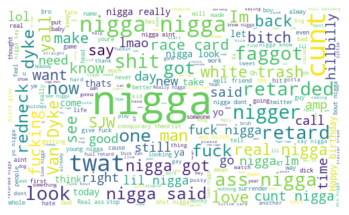

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_text = " ".join(map(str, clean_text))
wordcloud = WordCloud(max_font_size=60, max_words=250, background_color="white", width=500, height = 300).generate(word_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()